<center><h1>Assignment 3</h1></center>
<center><h4>Athina Ibanez Oktaviolla || PYTN-KS01-009</h4></center>
<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("dataset/bank-full.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Mencari kolom numerical

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Text(0, 0.5, 'previous')

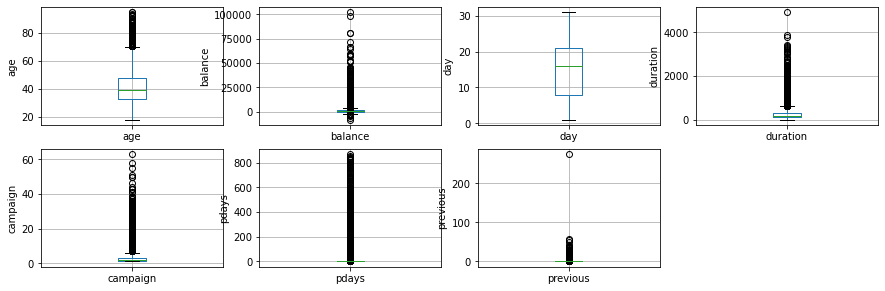

In [5]:
#memvisualisasikan kolom-kolom numerical dengan box plot

plt.figure(figsize=(15,10))

plt.subplot(4, 4, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')


plt.subplot(4, 4, 2)
fig = df.boxplot(column='balance')
fig.set_title('')
fig.set_ylabel('balance')


plt.subplot(4, 4, 3)
fig = df.boxplot(column='day')
fig.set_title('')
fig.set_ylabel('day')


plt.subplot(4, 4, 4)
fig = df.boxplot(column='duration')
fig.set_title('')
fig.set_ylabel('duration')

plt.subplot(4, 4, 5)
fig = df.boxplot(column='campaign')
fig.set_title('')
fig.set_ylabel('campaign')

plt.subplot(4, 4, 6)
fig = df.boxplot(column='pdays')
fig.set_title('')
fig.set_ylabel('pdays')

plt.subplot(4, 4, 7)
fig = df.boxplot(column='previous')
fig.set_title('')
fig.set_ylabel('previous')

### Note:
Disini terlihat outliers pada kolom age akan mengganggu performa model nantinya, sehingga harus di drop

# Drop Outliers

In [6]:
#Menghitung mean dan std

mean_age = df["age"].mean()
std_age = df["age"].std()

In [7]:
# Menghitung limit atas dan bawah

limit_atas = mean_age + (3*std_age)
limit_bawah = mean_age - (3*std_age)

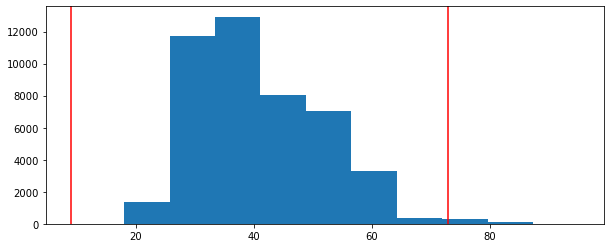

In [8]:
# bar plot untuk melihat visualisasi data 

fig, ax = plt.subplots(figsize=(10,4))
ax.hist(df["age"],)

ax.axvline(limit_atas, color='r')
ax.axvline(limit_bawah, color = 'r')
plt.show()

### Note:
Terlihat di visualisasi bahwa bar yang melewati daris merah merupakan outliers.
Tidak ada data yang melewati limit bawah.

In [9]:
#Mengambil data yang melewati limit

df = df[df["age"]<limit_atas]
df = df.reset_index()

In [10]:
df.head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
#drop kolom index

df = df.drop(["index"], axis = 1)

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# One-hot Encode

In [13]:
#menglihat kolom categorical

categorical = [var for var in df.columns if df[var].dtype=='O']
print(categorical)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [14]:
#one-hot encoding terhadap kolom katergorical

categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

def encoding_data(data):
    #import library
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # encode kolom categorical 
    df_encode = pd.DataFrame(encoder.fit_transform(df[categorical]))
    #mengambil nama sesuai kategori
    df_encode.columns = encoder.get_feature_names(categorical)
    
    #menghapus kolom yang ada di array kategorical
    new_df = df.drop(categorical ,axis=1)
    
    #menggambungkan kolom baru yang sudah di encode dan kolom lama
    new_df = pd.concat([df_encode, new_df], axis=1)
    
    #mengganti value kolom y denga 0 dan 1
    new_df.y.replace({'yes' : 1,'no' : 0}, inplace=True)
    return new_df

In [15]:
data = encoding_data(df)

In [16]:
data.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,58,2143,5,261,1,-1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,44,29,5,151,1,-1,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,33,2,5,76,1,-1,0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,47,1506,5,92,1,-1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,33,1,5,198,1,-1,0,0


### Note:
Data sudah bagus. namun pada kolom balance dan duration tidak terdistribusi dengna baik sehingga perlu dilakukan normalisasi

# Normalisasi

In [17]:
#menormalisasi kolom balance dan duration
for col in ["balance", "duration"]:
    minus = data[col].min()
    maxim = data[col].max()
    
    data[col] = data[col].apply(lambda v: (v - minus)/(maxim - minus))

In [18]:
data.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,58,0.092259,5,0.053070,1,-1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,44,0.073067,5,0.030704,1,-1,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,33,0.072822,5,0.015453,1,-1,0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,47,0.086476,5,0.018707,1,-1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,33,0.072812,5,0.040260,1,-1,0,0


# Spliting data
Membagi data train dan test. 80% train dan 20% test

In [19]:
def split_data(df,test_size):
    # Select Target
    target = df['y']
    # Select Features
    feature = df.drop('y', axis=1)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=test_size, 
                                                    random_state=1)

    return X_train,X_test,y_train,y_test 

In [20]:
X_train,X_test,y_train,y_test = split_data(data, 0.2)

# Evaluasi Model

In [21]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Memprediksi data test 
    y_pred = model.predict(x_test)

    # Menghitung accuracy, precision, recall, f1-score, dan kappa score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    kappa_score = metrics.cohen_kappa_score(y_test, y_pred)

    # Menghitung daerah dibawah curve
    y_pred_proba = model.predict_proba(x_test)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)

    # confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
           'fpr': fpr, 'tpr': tpr, 'auc_score': auc_score, 'cm': cm}

In [22]:
#Decision Tree model 
from sklearn import tree
model_dtree = tree.DecisionTreeClassifier(random_state=0)
model_dtree.fit(X_train, y_train)
eval_dtree = evaluate_model(model_dtree, X_test, y_test)
print('DTree Accuracy:', eval_dtree['accuracy'])

DTree Accuracy: 0.8826678563461967


In [23]:
#Random Forest model 
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)
eval_rf = evaluate_model(model_rf, X_test, y_test)
print('RandomForest Accuracy:', eval_rf['accuracy'])

RandomForest Accuracy: 0.9166852554093241


In [24]:
#Naive Bayes model 
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
eval_nb = evaluate_model(model_nb, X_test, y_test)
print('Naive Bayes Accuracy:', eval_nb['accuracy'])

Naive Bayes Accuracy: 0.8552308721838054


In [25]:
#KNN model 
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
eval_knn = evaluate_model(model_knn, X_test, y_test)
print('KNN Accuracy:', eval_knn['accuracy'])

KNN Accuracy: 0.8946018291322775


In [26]:
#SVM model 
from sklearn import svm
model_svm=svm.SVC(probability=True)
model_svm.fit(X_train,y_train)


SVC(probability=True)

In [27]:
eval_svm = evaluate_model(model_svm, X_test, y_test)
print('SVM Accuracy:', eval_svm['accuracy'])

SVM Accuracy: 0.8919250501896052


### Note:
Accuracy tertinggi ada pada model RandomForest dengan acc: 91%